In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable
import pickle

### load EVs

In [3]:
with open ('results/EVs_2HL.txt', 'rb') as fp:
    EVs_2HL = pickle.load(fp) #list of #points elements with d entries each, which are the eige
    
with open ('results/EVs_4HL.txt', 'rb') as fp:
    EVs_4HL = pickle.load(fp) #list of #points elements with d entries each, 
with open ('results/EVs_8HL.txt', 'rb') as fp:
    EVs_8HL = pickle.load(fp) 
    
with open ('results/EVs_16HL.txt', 'rb') as fp:
    EVs_16HL = pickle.load(fp) 
    
with open ('results/EVs_32HL.txt', 'rb') as fp:
    EVs_32HL = pickle.load(fp) 

split EVs into negative and positive part

In [4]:
EVs_4HL_neg=[]
for i in range(len(EVs_4HL)):
    EVs_4HL_neg.append(EVs_4HL[i][0:(EVs_4HL[i]>=0).nonzero()[0][0]])
    
EVs_8HL_neg=[]
for i in range(len(EVs_8HL)):
    EVs_8HL_neg.append(EVs_8HL[i][0:(EVs_8HL[i]>=0).nonzero()[0][0]])
    
    
EVs_16HL_neg=[]
for i in range(len(EVs_16HL)):
    EVs_16HL_neg.append(EVs_16HL[i][0:(EVs_16HL[i]>=0).nonzero()[0][0]])
    
     
EVs_32HL_neg=[]
for i in range(len(EVs_32HL)):
    EVs_32HL_neg.append(EVs_32HL[i][0:(EVs_32HL[i]>=0).nonzero()[0][0]])

## load covariance data

In [4]:
SGD_cov_POS_2HL=torch.load('results/SGD_cov_2HL_POS')# list of #points w/neg curvature with #neg EVs entries each
                                                # ,which are the avg correlation of SGD with that EV.
SGD_cov_NEG_2HL=torch.load('results/SGD_cov_2HL_NEG')
uniform_cov_POS_2HL=torch.load('results/uniform_cov_2HL_POS')
uniform_cov_NEG_2HL=torch.load('results/uniform_cov_2HL_NEG')

SGD_cov_POS_4HL=torch.load('results/SGD_cov_4HL_POS')
SGD_cov_NEG_4HL=torch.load('results/SGD_cov_4HL_NEG')
uniform_cov_POS_4HL=torch.load('results/uniform_cov_4HL_POS')
uniform_cov_NEG_4HL=torch.load('results/uniform_cov_4HL_NEG')

SGD_cov_POS_8HL=torch.load('results/SGD_cov_8HL_POS')
SGD_cov_NEG_8HL=torch.load('results/SGD_cov_8HL_NEG')
uniform_cov_POS_8HL=torch.load('results/uniform_cov_8HL_POS')
uniform_cov_NEG_8HL=torch.load('results/uniform_cov_8HL_NEG')

SGD_cov_POS_16HL=torch.load('results/SGD_cov_16HL_POS')
SGD_cov_NEG_16HL=torch.load('results/SGD_cov_16HL_NEG')
uniform_cov_POS_16HL=torch.load('results/uniform_cov_16HL_POS')
uniform_cov_NEG_16HL=torch.load('results/uniform_cov_16HL_NEG')

SGD_cov_POS_32HL=torch.load('results/SGD_cov_32HL_POS')
SGD_cov_NEG_32HL=torch.load('results/SGD_cov_32HL_NEG')
uniform_cov_POS_32HL=torch.load('results/uniform_cov_32HL_POS')
uniform_cov_NEG_32HL=torch.load('results/uniform_cov_32HL_NEG')

In [5]:
SGD_cov_POS_2HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_2HL]
SGD_cov_NEG_2HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_2HL]

uniform_cov_POS_2HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_2HL]
uniform_cov_NEG_2HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_2HL]


SGD_cov_POS_4HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_4HL]
SGD_cov_NEG_4HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_4HL]

uniform_cov_POS_4HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_4HL]
uniform_cov_NEG_4HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_4HL]

SGD_cov_POS_8HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_8HL]
SGD_cov_NEG_8HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_8HL]

uniform_cov_POS_8HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_8HL]
uniform_cov_NEG_8HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_8HL]

SGD_cov_POS_16HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_16HL]
SGD_cov_NEG_16HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_16HL]

uniform_cov_POS_16HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_16HL]
uniform_cov_NEG_16HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_16HL]

SGD_cov_POS_32HL_mean= [torch.mean(entry) for entry in SGD_cov_POS_32HL]
SGD_cov_NEG_32HL_mean= [torch.mean(entry) for entry in SGD_cov_NEG_32HL]

uniform_cov_POS_32HL_mean= [torch.mean(entry) for entry in uniform_cov_POS_32HL]
uniform_cov_NEG_32HL_mean= [torch.mean(entry) for entry in uniform_cov_NEG_32HL]



In [6]:
SGD_cov_POS_2HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_2HL]
SGD_cov_NEG_2HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_2HL]

uniform_cov_POS_2HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_2HL]
uniform_cov_NEG_2HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_2HL]

SGD_cov_POS_4HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_4HL]
SGD_cov_NEG_4HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_4HL]

uniform_cov_POS_4HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_4HL]
uniform_cov_NEG_4HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_4HL]

SGD_cov_POS_8HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_8HL]
SGD_cov_NEG_8HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_8HL]

uniform_cov_POS_8HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_8HL]
uniform_cov_NEG_8HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_8HL]

SGD_cov_POS_16HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_16HL]
SGD_cov_NEG_16HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_16HL]

uniform_cov_POS_16HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_16HL]
uniform_cov_NEG_16HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_16HL]


SGD_cov_POS_32HL_sum= [torch.sum(entry) for entry in SGD_cov_POS_32HL]
SGD_cov_NEG_32HL_sum= [torch.sum(entry) for entry in SGD_cov_NEG_32HL]

uniform_cov_POS_32HL_sum= [torch.sum(entry) for entry in uniform_cov_POS_32HL]
uniform_cov_NEG_32HL_sum= [torch.sum(entry) for entry in uniform_cov_NEG_32HL]

In [7]:
SGD_cov_rightEV_2HL=0
SGD_cov_rightEV_2HL= [SGD_cov_rightEV_2HL+entry[-1] for entry in SGD_cov_POS_2HL]

SGD_cov_leftEV_2HL=0
SGD_cov_leftEV_2HL= [SGD_cov_leftEV_2HL+entry[0] for entry in SGD_cov_NEG_2HL]

SGD_cov_rightEV_4HL=0
SGD_cov_rightEV_4HL= [SGD_cov_rightEV_4HL+entry[-1] for entry in SGD_cov_POS_4HL]

SGD_cov_leftEV_4HL=0
SGD_cov_leftEV_4HL= [SGD_cov_leftEV_4HL+entry[0] for entry in SGD_cov_NEG_4HL]

SGD_cov_rightEV_8HL=0
SGD_cov_rightEV_8HL= [SGD_cov_rightEV_8HL+entry[-1] for entry in SGD_cov_POS_8HL]

SGD_cov_leftEV_8HL=0
SGD_cov_leftEV_8HL= [SGD_cov_leftEV_8HL+entry[0] for entry in SGD_cov_NEG_8HL]

SGD_cov_rightEV_16HL=0
SGD_cov_rightEV_16HL= [SGD_cov_rightEV_16HL+entry[-1] for entry in SGD_cov_POS_16HL]

SGD_cov_leftEV_16HL=0
SGD_cov_leftEV_16HL= [SGD_cov_leftEV_16HL+entry[0] for entry in SGD_cov_NEG_16HL]

SGD_cov_rightEV_32HL=0
SGD_cov_rightEV_32HL= [SGD_cov_rightEV_32HL+entry[-1] for entry in SGD_cov_POS_32HL]

SGD_cov_leftEV_32HL=0
SGD_cov_leftEV_32HL= [SGD_cov_leftEV_32HL+entry[0] for entry in SGD_cov_NEG_32HL]

uniform_cov_rightEV_2HL=0
uniform_cov_rightEV_2HL= [uniform_cov_rightEV_2HL+entry[-1] for entry in uniform_cov_POS_2HL]

uniform_cov_leftEV_2HL=0
uniform_cov_leftEV_2HL= [uniform_cov_leftEV_2HL+entry[0] for entry in uniform_cov_NEG_2HL]

uniform_cov_rightEV_4HL=0
uniform_cov_rightEV_4HL= [uniform_cov_rightEV_4HL+entry[-1] for entry in uniform_cov_POS_4HL]

uniform_cov_leftEV_4HL=0
uniform_cov_leftEV_4HL= [uniform_cov_leftEV_4HL+entry[0] for entry in uniform_cov_NEG_4HL]

uniform_cov_rightEV_8HL=0
uniform_cov_rightEV_8HL= [uniform_cov_rightEV_8HL+entry[-1] for entry in uniform_cov_POS_8HL]

uniform_cov_leftEV_8HL=0
uniform_cov_leftEV_8HL= [uniform_cov_leftEV_8HL+entry[0] for entry in uniform_cov_NEG_8HL]

uniform_cov_rightEV_16HL=0
uniform_cov_rightEV_16HL= [uniform_cov_rightEV_16HL+entry[-1] for entry in uniform_cov_POS_16HL]

uniform_cov_leftEV_16HL=0
uniform_cov_leftEV_16HL= [uniform_cov_leftEV_16HL+entry[0] for entry in uniform_cov_NEG_16HL]

uniform_cov_rightEV_32HL=0
uniform_cov_rightEV_32HL= [uniform_cov_rightEV_32HL+entry[-1] for entry in uniform_cov_POS_32HL]

uniform_cov_leftEV_32HL=0
uniform_cov_leftEV_32HL= [uniform_cov_leftEV_32HL+entry[0] for entry in uniform_cov_NEG_32HL]


# make plots

In [9]:
import seaborn as sns


(0, 0.05)

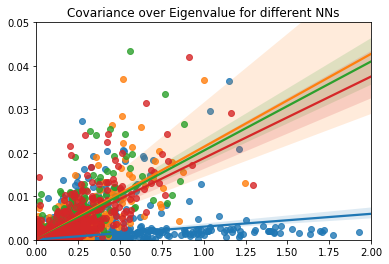

In [10]:
import itertools
import seaborn as sns

x=''
for j in range(len(EVs_4HL_neg)):
        x=itertools.chain(x,EVs_4HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)

y=''
for j in range(len(EVs_4HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_4HL[j])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)
ax.set_title('Covariance over Eigenvalue for different NNs')
#ax.set_xlim(-5,0)

x=''
for j in range(len(EVs_8HL_neg)):
        x=itertools.chain(x,EVs_8HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_8HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_8HL[j])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)

#ax.set_xlim(-5,0)



x=''
for j in range(len(EVs_16HL_neg)):
        x=itertools.chain(x,EVs_16HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_16HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_16HL[j])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)


x=''
for j in range(len(EVs_32HL_neg)):
        x=itertools.chain(x,EVs_32HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_32HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_32HL[j])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)
ax.set_xlim(0,2)
ax.set_ylim(0,0.05)

In [11]:
x=''
for j in range(len(EVs_32HL_neg)):
        x=itertools.chain(x,EVs_32HL_neg[j])
        
x=list(x)
x=array(x)
x=abs(x)
y=''
for j in range(len(EVs_32HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_32HL[j])
        
y=list(y)
y=array(y)

ax=sns.regplot(x,y)
#ax.set_xlim(0,2)
#ax.set_ylim(0,0.05)

NameError: name 'array' is not defined

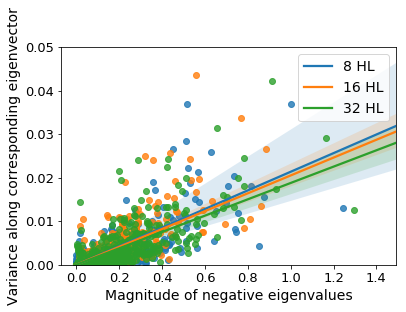

In [12]:
np.fig = plt.figure(1)
x=''
for j in range(len(EVs_8HL_neg)):
        x=itertools.chain(x,EVs_8HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_8HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_8HL[j])
        
y=list(y)
y=np.array(y)
ax=sns.regplot(x,y,)
#ax.set_xlim(0,2)
#ax.set_ylim(0,0.05)

x=''
for j in range(len(EVs_16HL_neg)):
        x=itertools.chain(x,EVs_16HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_16HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_16HL[j])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y) #4CAF50')
#ax.set_xlim(0,2)
#ax.set_ylim(0,0.05)

x=''
for j in range(len(EVs_32HL_neg)):
        x=itertools.chain(x,EVs_32HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_32HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_32HL[j])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)
#ax.set_xlim(0,2)
ax.legend(['8 HL', '16 HL', '32 HL'],fontsize=14,fancybox=True)
ax.set_ylim(0,0.05)
ax.tick_params(labelsize=13)
ax.set_xlabel('Magnitude of negative eigenvalues',fontsize=14)
ax.set_ylabel('Variance along corresponding eigenvector',fontsize=14)

plt.savefig('cov_over_ev.pdf',dpi=10)



In [13]:
sns.set_style("whitegrid")

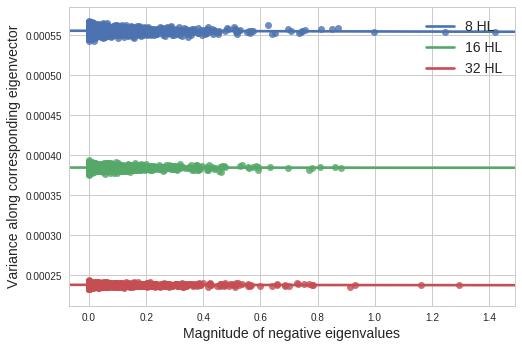

In [27]:
x=''
for j in range(len(EVs_8HL_neg)):
        x=itertools.chain(x,EVs_8HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_8HL_neg)):
        y=itertools.chain(y,uniform_cov_NEG_8HL[j][0:len(EVs_8HL_neg[j])])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)
#ax.set_xlim(0,2)
#ax.set_ylim(0,0.05)

x=''
for j in range(len(EVs_16HL_neg)):
        x=itertools.chain(x,EVs_16HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_16HL_neg)):
        y=itertools.chain(y,uniform_cov_NEG_16HL[j][0:len(EVs_16HL_neg[j])])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)


x=''
for j in range(len(EVs_32HL_neg)):
        x=itertools.chain(x,EVs_32HL_neg[j])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_32HL_neg)):
        y=itertools.chain(y,uniform_cov_NEG_32HL[j][0:len(EVs_32HL_neg[j])])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)
ax.set_xlabel('Magnitude of negative eigenvalues',fontsize=14)
ax.set_ylabel('Variance along corresponding eigenvector',fontsize=14)

ax.legend(['8 HL', '16 HL', '32 HL'],fontsize=14,fancybox=True, loc=1)

#ax.set_xlim(0,2)
#ax.set_ylim(0,0.05)
plt.savefig('cov_over_ev_uniform.png')



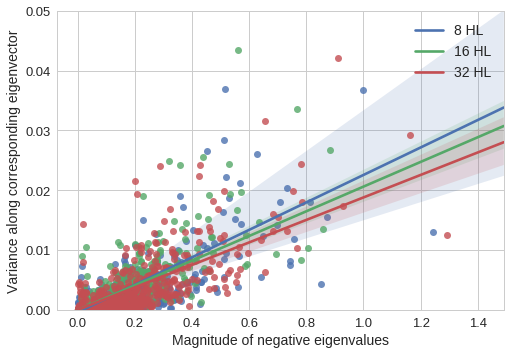

In [28]:
np.fig = plt.figure(1)
x=''
for j in range(len(EVs_8HL_neg)):
        x=itertools.chain(x,EVs_8HL_neg[j][:-750])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_8HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_8HL[j][:-750])
        
y=list(y)
y=np.array(y)
ax=sns.regplot(x,y,)
#ax.set_xlim(0,2)
#ax.set_ylim(0,0.05)

x=''
for j in range(len(EVs_16HL_neg)):
        x=itertools.chain(x,EVs_16HL_neg[j][:-750])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_16HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_16HL[j][:-750])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y) #4CAF50')
#ax.set_xlim(0,2)
#ax.set_ylim(0,0.05)

x=''
for j in range(len(EVs_32HL_neg)):
        x=itertools.chain(x,EVs_32HL_neg[j][:-750])
        
x=list(x)
x=np.array(x)
x=abs(x)
y=''
for j in range(len(EVs_32HL_neg)):
        y=itertools.chain(y,SGD_cov_NEG_32HL[j][:-750])
        
y=list(y)
y=np.array(y)

ax=sns.regplot(x,y)
#ax.set_xlim(0,2)
ax.legend(['8 HL', '16 HL', '32 HL'],fontsize=14,fancybox=True)
ax.set_ylim(0,0.05)
ax.tick_params(labelsize=13)
ax.set_xlabel('Magnitude of negative eigenvalues',fontsize=14)
ax.set_ylabel('Variance along corresponding eigenvector',fontsize=14)

plt.savefig('cov_over_ev_2.pdf')

